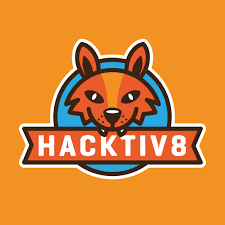

SIB-Kampus Merdeka

Nama Anggota Kelompok  :  
1. Elsa Wulandari - 002

2. Nurianti Ahmad  - 021

# A. Latar Belakang
Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

# Dataset

Data yang digunakan dalam project ini adalah dataset faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.
Dataset ini dapat di akses melalui link https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

### Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# B. Import Required Libraries

In [1]:
# Import library yang akan digunakan

import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# C. Data Loading

Pada section data loading kami melakukan :
- dimension of data frame
- melihat tipe data dari setiap kolom
- melihat kolom yang ada di dataset
- melihat total data unik
- melihat data unik dari atribut
- melihat basic statistik kolom numerik

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Dimension of dataframe**

In [3]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
299 baris
13 kolom


In [4]:
#melihat tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Colomns yang ada di dataset**

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
for col in df.columns:
    print(col,': ', df[col].nunique())#melihat total data uniq

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


**Melihat data unique**

Melihat nilai unik dari atribut 'age'

In [7]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

Melihat nilai unik dari atribut 'anaemia'

In [8]:
df['anaemia'].unique()

array([0, 1], dtype=int64)

Melihat nilai unik dari atribut 'creatine_phosphokinase'

In [9]:
df['creatinine_phosphokinase'].unique()

array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133,  514,
         59,  156,   61,  305,  898, 5209,   53,  328,  748, 1876,  936,
        292,  369,  143,  754,  400,   96,  737,  358,  200,  248,  270,
       1808, 1082,  719,  193, 4540,  646,  281, 1548,  805,  291,  482,
        943,  185,  132, 1610, 2261,  233,   30, 1846,  335,   58,  910,
         72,  130, 2334, 2442,  776,  196,  835, 3966,  171,  198,   95,
       1419,  478,  176,  395,   99,  145,  104, 1896,  151,  244,   62,
        121,  418,  167, 1211, 1767,  308,   97,   

melihat nilai unik yang tersimpan di atribut 'diabetes'

In [10]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

melihat nilai unik yang tersimpan di atribut 'ejection_fraction'

In [11]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

melihat nilai unik yang tersimpan di atribut 'high_blood_pressure'

In [12]:
df['high_blood_pressure'].unique()

array([1, 0], dtype=int64)

melihat nilai unik yang tersimpan di atribut 'platelets'

In [13]:
df['platelets'].unique()

array([265000.  , 263358.03, 162000.  , 210000.  , 327000.  , 204000.  ,
       127000.  , 454000.  , 388000.  , 368000.  , 253000.  , 136000.  ,
       276000.  , 427000.  ,  47000.  , 262000.  , 166000.  , 237000.  ,
        87000.  , 297000.  , 289000.  , 149000.  , 196000.  , 284000.  ,
       153000.  , 200000.  , 360000.  , 319000.  , 302000.  , 188000.  ,
       228000.  , 226000.  , 321000.  , 305000.  , 329000.  , 185000.  ,
       218000.  , 194000.  , 310000.  , 271000.  , 451000.  , 140000.  ,
       395000.  , 418000.  , 351000.  , 255000.  , 461000.  , 223000.  ,
       216000.  , 254000.  , 390000.  , 385000.  , 119000.  , 213000.  ,
       274000.  , 244000.  , 497000.  , 374000.  , 122000.  , 243000.  ,
       266000.  , 317000.  , 283000.  , 324000.  , 293000.  , 172000.  ,
       406000.  , 173000.  , 304000.  , 235000.  , 181000.  , 249000.  ,
       219000.  , 318000.  , 221000.  , 298000.  , 286000.  , 621000.  ,
       263000.  , 850000.  , 306000.  , 252000.  , 

melihat nilai unik yang tersimpan di atribut 'serum_creatinine'

In [14]:
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

melihat nilai unik yang tersimpan di atribut 'sex'

In [15]:
df['sex'].unique()

array([1, 0], dtype=int64)

melihat nilai unik yang tersimpan di atribut 'DEATH_EVENT'

In [16]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

melihat nilai unik yang tersimpan di atribut 'time'

In [17]:
df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

melihat nilai unik yang tersimpan di atribut 'smoking'

In [18]:
df['smoking'].unique()

array([0, 1], dtype=int64)

**View Basic statistic numerical column**

In [19]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Cleaning

Pada section data loading kami melakukan :
- Check duplicate data
- View number of missing value

**Check duplicate data**

In [20]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) 

Jumlah Duplicate Data  0


**View number of missing value**

In [21]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum().sort_values() #Check if any column has null values

Jumlah Missing Value tiap column: 


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Analisis : Dari data tersebut dapat dilihat bahwa tidak ada missing value. Oleh karena itu, kita bisa lanjutkan ke step selanjutnya

# Exploratory Data Analysis

Dari eksplorasi data kita akan melihat sebuah distribusi death event dari atribut sex, smoking, diabetes, anaemia, high_blood_pressure

In [22]:
df_e = df.copy()

# mengubah value 0 dan 1 (untuk visualisasi)
df_e['DEATH_EVENT'].replace({0:'Bertahan hidup', 1: 'Tidak Bertahan hidup'}, inplace=True)
df_e['sex'].replace({0:'Wanita', 1:'Pria'}, inplace=True)
df_e['smoking'].replace({0:'Tidak Merokok', 1:'Merokok'}, inplace=True)
df_e['diabetes'].replace({0:'Tidak Memiliki Diabetes', 1:'Memiliki Diabetes'}, inplace=True)
df_e['anaemia'].replace({0:'Tidak Memiliki Anemia', 1:'Memiliki Anemia'}, inplace=True)
df_e['high_blood_pressure'].replace({0:'Tidak memiliki Hipertensi', 1:'Memiliki Hipertensi'}, inplace=True)

**Questions :** Berapa banyak orang yang dapat bertahaan hidup dan tidak saat terkena penyakit kardiovaskular?

In [23]:
df_e['DEATH_EVENT'].value_counts()

Bertahan hidup          203
Tidak Bertahan hidup     96
Name: DEATH_EVENT, dtype: int64

**Visualizations :**

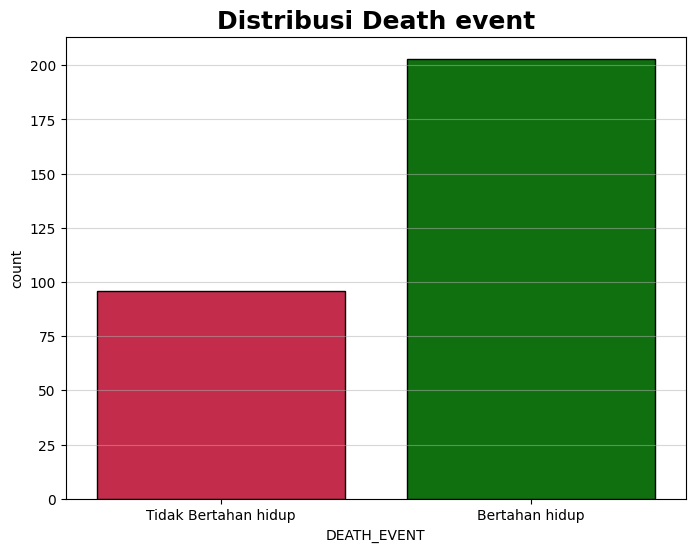

In [24]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='DEATH_EVENT', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data dapat dilihat bahwa data orang-orang yang bertahan hidup lebih tinggi dibandingkan orang-orang yang tidak dapat bertahan hidup saat mengalami penyakit  kardiovaskular

**Questions :** Berapa banyak pria dan wanita yang terkena penyakit kardiovaskular ?

In [25]:
df_e['sex'].value_counts()

Pria      194
Wanita    105
Name: sex, dtype: int64

**Visualizations :**

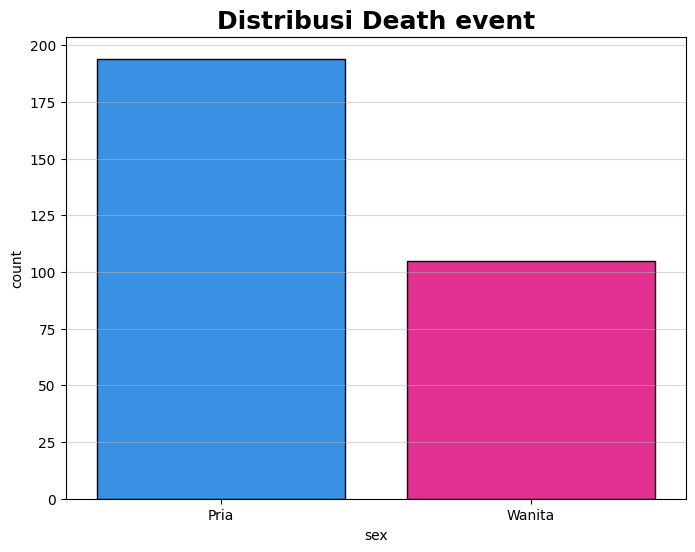

In [26]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='sex', data = df_e, palette = ['#1E90FF', "#FF1493"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data jika di kualifikasikan berdasarkan jenis kelamin, pria lebih banyak yang mengalami penyakit kardiovaskular dibandingkan wanita 

**Questions :** Berapa banyak pasien kardiovaskular yang memiliki kebiasan merokok dan tidak?

In [27]:
df_e['smoking'].value_counts()

Tidak Merokok    203
Merokok           96
Name: smoking, dtype: int64

**Visualizations :**

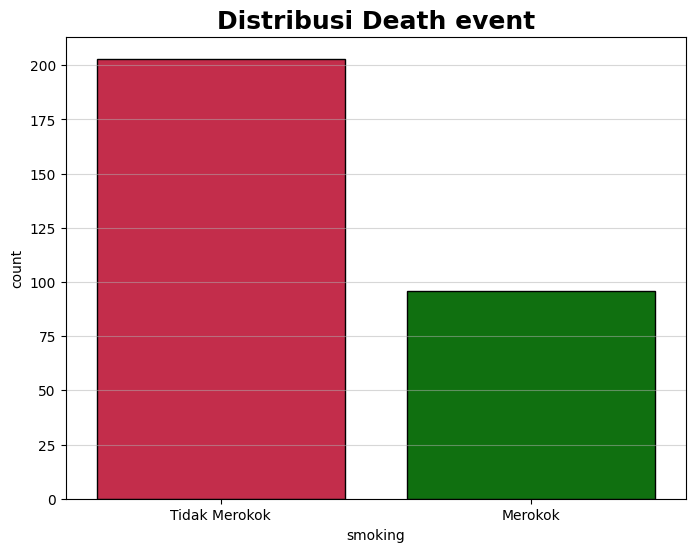

In [28]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='smoking', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak merokok lebih banyak mengalami penyakit kardiovaskular dibandingkan dengan pasien yang merokok

**Questions :** Berapa banyak pasien kardiovaskular yang memiliki riwayat diabetes dan yang tidak?

In [29]:
df_e['diabetes'].value_counts()

Tidak Memiliki Diabetes    174
Memiliki Diabetes          125
Name: diabetes, dtype: int64

**Visualizations :**

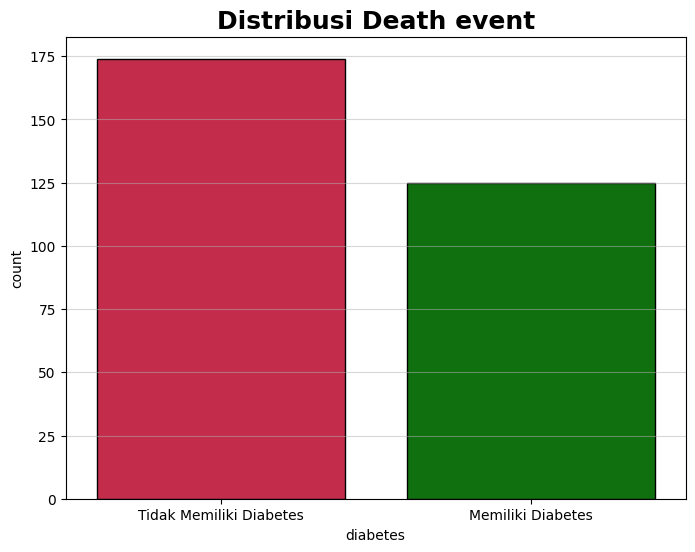

In [30]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='diabetes', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami diabetes lebih banyak dibandingkan pasien yang memiliki riwayat diabetes

**Questions :** Berapa banyak pasien kardiovaskular yang mengalami anaemia dan yang tidak?

In [31]:
df_e['anaemia'].value_counts()

Tidak Memiliki Anemia    170
Memiliki Anemia          129
Name: anaemia, dtype: int64

**Visualizations :**

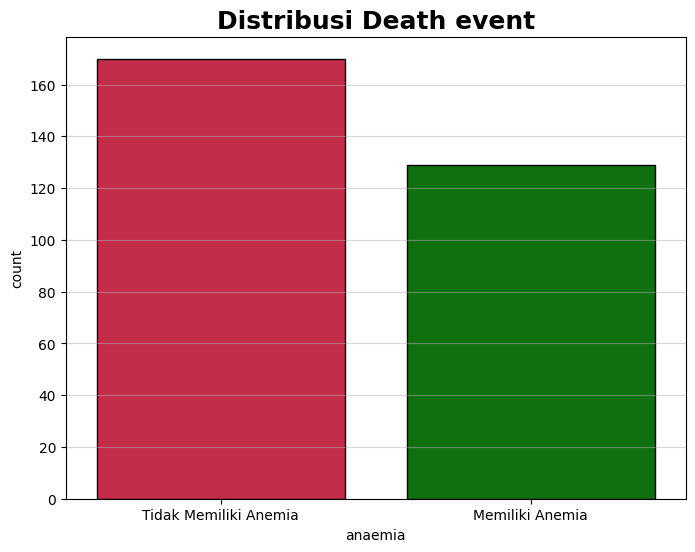

In [32]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='anaemia', data = df_e, palette = ['#DC143C', "#008000"], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami anaemia lebih banyak dibandingkan pasien yang mengalami anaemia

**Questions :** Berapa banyak pasien yang memiliki riwayat darah tinggi dan yang tidak?

In [33]:
df_e['high_blood_pressure'].value_counts()

Tidak memiliki Hipertensi    194
Memiliki Hipertensi          105
Name: high_blood_pressure, dtype: int64

**Visualizations :**

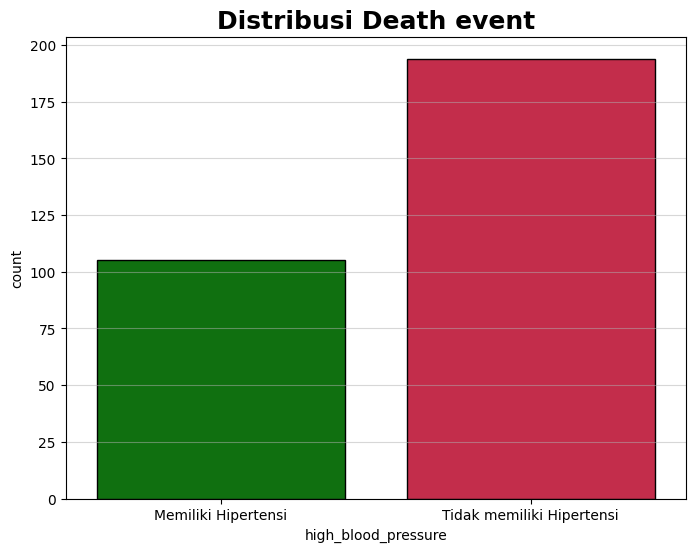

In [34]:
plt.figure(figsize=(8, 6))
 
plt.title('Distribusi Death event', fontsize=18 , fontweight='bold')
plt.grid(axis='y', alpha=0.5)
sns.countplot(x ='high_blood_pressure', data = df_e, palette = ["#008000",'#DC143C'], edgecolor = "black", linewidth =1)

plt.show()

Analisis : Menurut data, dapat dilihat bahwa pasien yang tidak mengalami darah tinggi lebah banyak dibandingkan pasien yang memiliki riwayat darah tinggi

**Selanjutnya melihat korelasi atribut lain terhadap atribut death event**

In [35]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

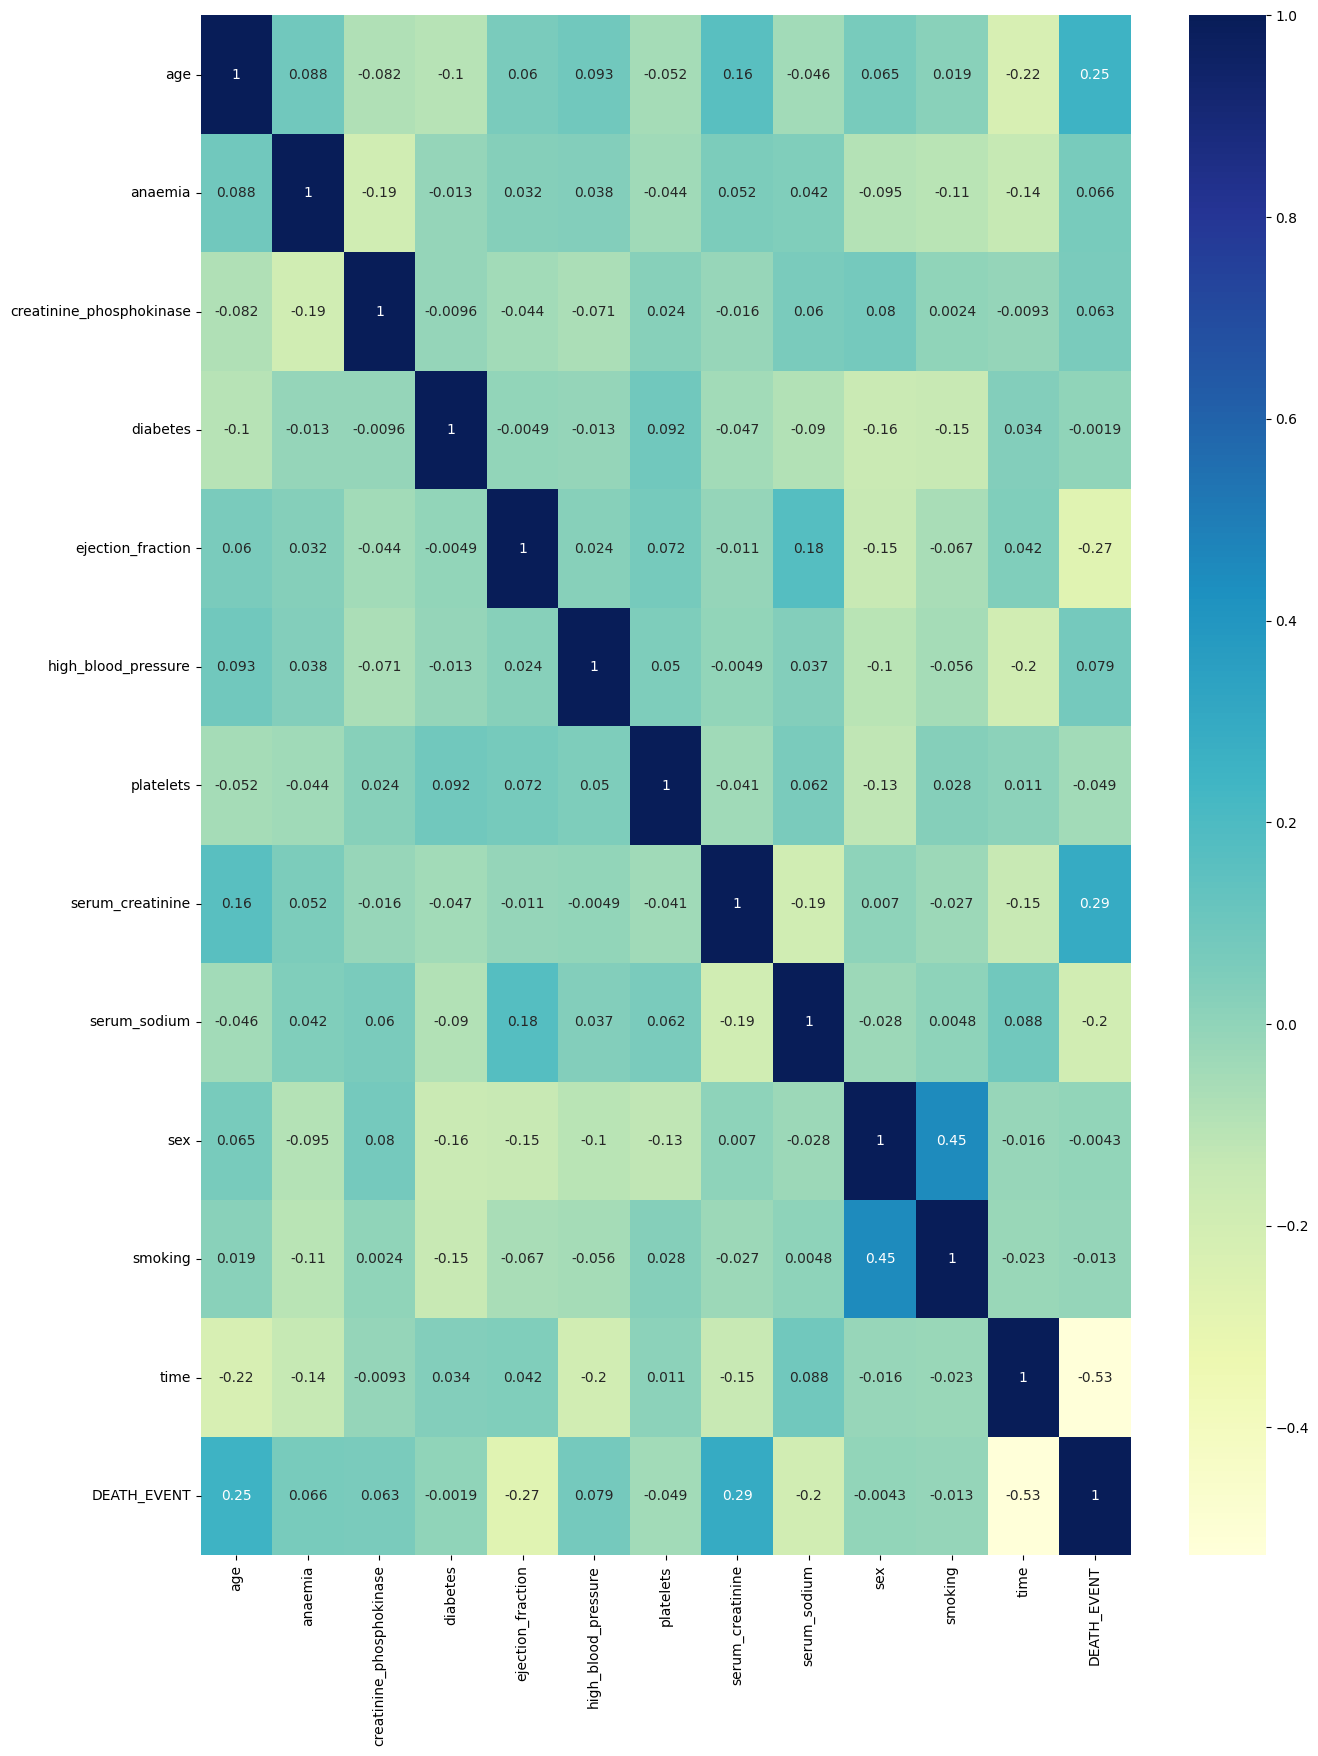

In [36]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

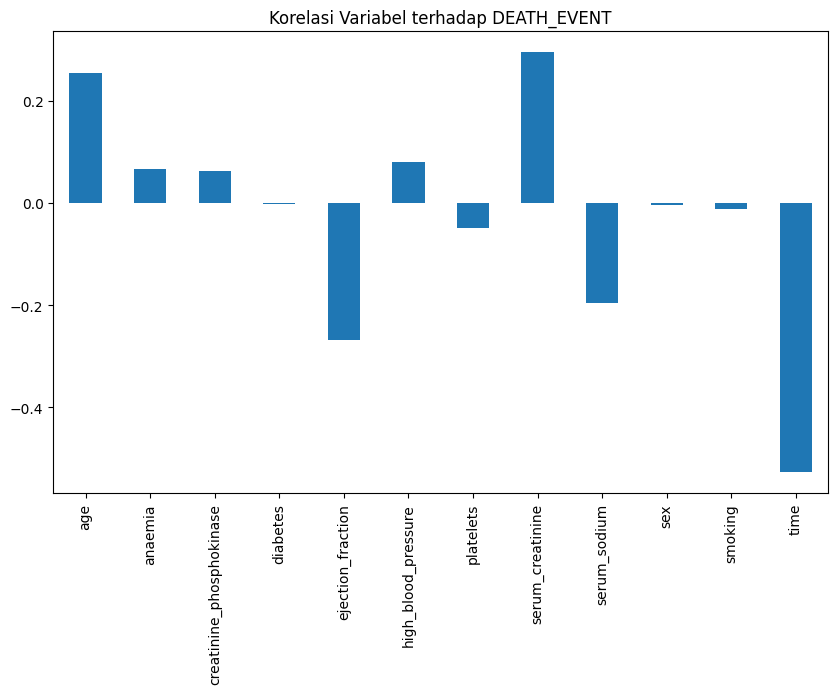

In [37]:
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['DEATH_EVENT'], inplace=False).corrwith(df.DEATH_EVENT)
korelasi.plot.bar(title='Korelasi Variabel terhadap DEATH_EVENT');

Dikarenakan target data yang dicari adalah data death event. Maka, korelasi death event yang dibutuhkan.

In [38]:
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Analisis :

- Atribut yang memiliki korelasi tertinggi  yaitu atribut serum_creatinine,age,high_blood_pressure,anaemia,creatinine_phosphokinase
- Atribut yang memiliki korelasi negatif yaitu atribut diabetes,sex,smoking,platelets,serum_sodium,ejection_fraction


# Data Preprocessing

In [39]:
df_encode = [i for i in df.columns if i != 'DEATH_EVENT']

**Feature Scaling**

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df_encode] = scaler.fit_transform(df[df_encode])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


In [41]:
X = df.drop(['DEATH_EVENT'], axis=1)

y = df ['DEATH_EVENT']

In [42]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


# Modeling

In [43]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=10)

# Random Forest Classifier

In [44]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred1  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        61
           1       0.81      0.76      0.79        29

    accuracy                           0.87        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.87      0.87      0.87        90



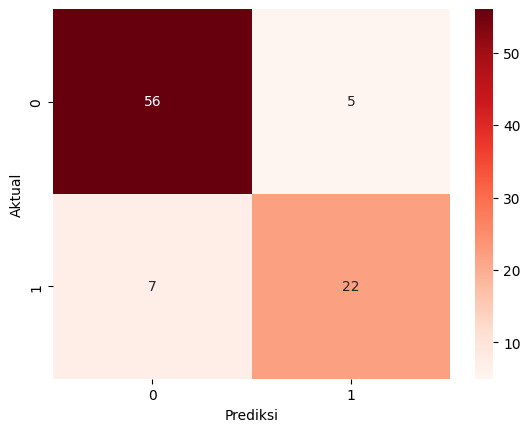

In [45]:
# Menggunakan seaborn untuk CM
cm = confusion_matrix(y_test, pred1)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

# XGB Classifier

In [46]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred2  = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

Accuracy Score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        61
           1       0.85      0.79      0.82        29

    accuracy                           0.89        90
   macro avg       0.88      0.86      0.87        90
weighted avg       0.89      0.89      0.89        90



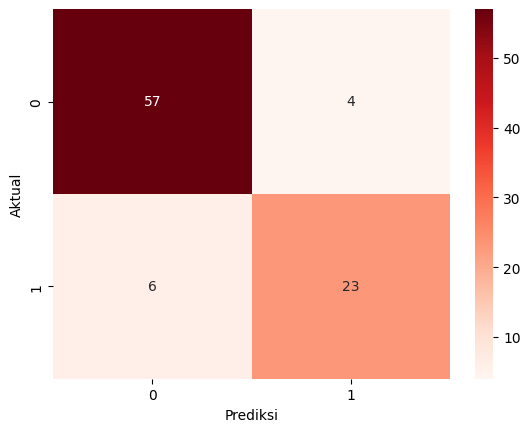

In [47]:
# Menggunakan seaborn untuk CM
cm = confusion_matrix(y_test, pred2)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test),
                        index = np.unique(y_test))

cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g');

# Logistic Regression


In [48]:
#menentukan model klasifikasi
model= LogisticRegression()

#training model
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

In [49]:
#prediksi respon untuk dataset test
y_pred3 = model.predict(X_test)

#membuat hasil prediksi kematian akibat gagal ginjal
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['predicted_Death_Event'] = y_pred3
df_test.head(10)

print("Accuracy Score:", str(model.score(X_test, y_test)))

Accuracy Score: 0.7777777777777778


# Conclusions


Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

1. Terdapat 12 atribut yang memengaruhi untuk memprediksi kematian akibat gagal jantung. 

2. Variabel atribut serum_creatinine, age, high_blood_pressure, anaemia, creatinine_phosphokinase yang paling berpengaruh terhadap death event.

3. Model ensemble yang paling optimal menurut kami adalah yaitu model XGB Classifier diperoleh akurasi sebesar 0,88 dengan confusion matrix :
    1. True Positives (Actual Positive:1 and Predict Positive:1) - 57
    2. True Negatives (Actual Negative:0 and Predict Negative:0) - 23
    3. False Positives (Actual Negative:0 but Predict Positive:1) - 4
    4. False Negatives (Actual Positive:1 but Predict Negative:0) - 6


